# Import software libraries and load the dataset #

## Import VisualizeNN.py File to draw  the Neural Network after training:

In [1]:
!gdown --id 1fi2XPvSFe-LC-JfWruFl6HRCOSd7gZ8u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fi2XPvSFe-LC-JfWruFl6HRCOSd7gZ8u
To: /content/VisualizeNN.py
100% 9.49k/9.49k [00:00<00:00, 23.0MB/s]


In [2]:
import sys                             # Read system parameters.
import os                              # Interact with the operating system.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
from sklearn.utils import shuffle
import VisualizeNN as VisNN            # Create neural network visualizations.
from time import time                  # Calculate training time.

# Load the dataset.
data_raw = pd.read_csv('https://raw.githubusercontent.com/AnasAlmana/Neural-Networks/main/occupancy_data/train.csv')
data_raw_test = pd.read_csv('https://raw.githubusercontent.com/AnasAlmana/Neural-Networks/main/occupancy_data/test.csv')
print('Loaded {} records.'.format(len(data_raw)))
print('Loaded {} records.'.format(len(data_raw_test)))

Loaded 8143 records.
Loaded 2665 records.


In [3]:
data_raw.info()
data_raw.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8143 non-null   object 
 1   Temperature       8143 non-null   float64
 2   RelativeHumidity  8143 non-null   float64
 3   Light             8143 non-null   float64
 4   CO2               8143 non-null   float64
 5   HumidityRatio     8143 non-null   float64
 6   Occupancy         8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2/4/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,2/4/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,2/4/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,2/4/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


# Get acquainted with the dataset #

In [4]:
# Shuffle the dataset.
data_raw = shuffle(data_raw, random_state = 765)
data_raw.reset_index(inplace = True, drop=True)

data_raw_test = shuffle(data_raw_test, random_state = 765)
data_raw_test.reset_index(inplace = True, drop=True)

print(data_raw.info())      # View data types and see if there are missing entries.
data_raw.head(5)           # View first 10 records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8143 non-null   object 
 1   Temperature       8143 non-null   float64
 2   RelativeHumidity  8143 non-null   float64
 3   Light             8143 non-null   float64
 4   CO2               8143 non-null   float64
 5   HumidityRatio     8143 non-null   float64
 6   Occupancy         8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB
None


,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio,Occupancy
0,2/5/2015 19:37,21.200,19.840,0.0,525.333333,0.003082,0
1,2/4/2015 22:11,21.390,25.700,0.0,475.000000,0.004046,0
2,2/9/2015 13:51,21.245,32.925,474.5,1126.500000,0.005146,1
3,2/5/2015 20:36,21.200,19.390,0.0,472.500000,0.003012,0
4,2/10/2015 2:39,20.290,32.900,0.0,460.000000,0.004846,0


# Examine the distribution of various features

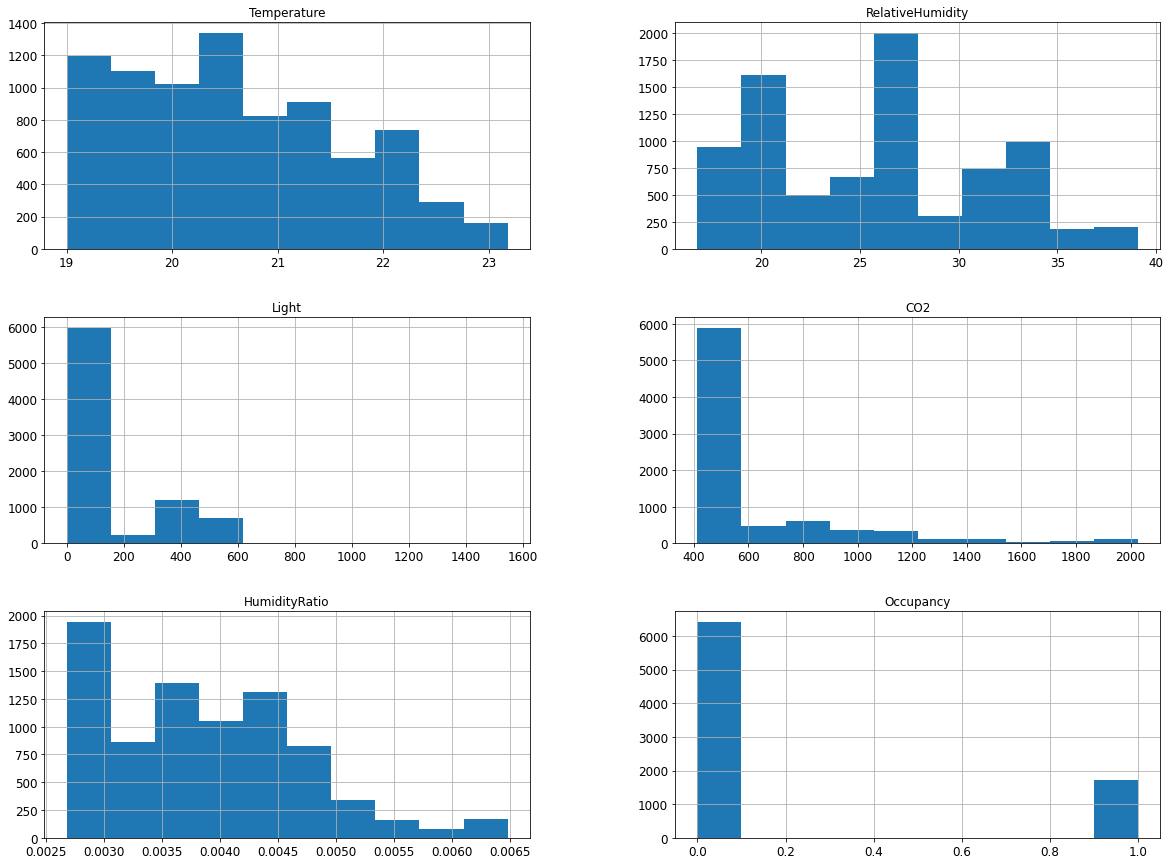

<Figure size 432x288 with 0 Axes>

In [5]:
# Use Matplotlib to plot figures.
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_raw.hist(figsize=(20,15));
plt.figure();

# Examine a general summary of statistics #

In [6]:
with pd.option_context('float_format', '{:.3f}'.format): 
    print(data_raw.describe())


       Temperature  RelativeHumidity    Light      CO2  HumidityRatio  \
count     8143.000          8143.000 8143.000 8143.000       8143.000   
mean        20.619            25.732  119.519  606.546          0.004   
std          1.017             5.531  194.756  314.321          0.001   
min         19.000            16.745    0.000  412.750          0.003   
25%         19.700            20.200    0.000  439.000          0.003   
50%         20.390            26.223    0.000  453.500          0.004   
75%         21.390            30.533  256.375  638.833          0.004   
max         23.180            39.117 1546.333 2028.500          0.006   

       Occupancy  
count   8143.000  
mean       0.212  
std        0.409  
min        0.000  
25%        0.000  
50%        0.000  
75%        0.000  
max        1.000  


# Split the label from the datasets

In [7]:
# Separate training and test sets already exist.

# 'Occupancy' is the dependent variable (value to be predicted), so it will be
# removed from the training and testing data and put into a separate DataFrame for labels.
label_columns = ['Occupancy']

training_columns = ['Date', 'Temperature', 'RelativeHumidity', 'Light', 'CO2', 'HumidityRatio']

# Split the training and test datasets and their labels.
X_train, y_train = data_raw[training_columns].copy(), data_raw[label_columns].copy()
X_test, y_test = data_raw_test[training_columns].copy(), data_raw_test[label_columns].copy()

# Compare the number of rows and columns in the original data to the training and test sets.
print(f'Original set:        {data_raw.shape}')
print('------------------------------')
print(f'Training features:   {X_train.shape}')
print(f'Test features:       {X_test.shape}')
print(f'Training labels:     {y_train.shape}')
print(f'Test labels:         {y_test.shape}')

Original set:        (8143, 7)
------------------------------
Training features:   (8143, 6)
Test features:       (2665, 6)
Training labels:     (8143, 1)
Test labels:         (2665, 1)


# Convert the `Date` column to datetime format for processing

In [8]:
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date'] = pd.to_datetime(X_test['Date'])

X_train.head()

,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio
0,2015-02-05 19:37:00,21.200,19.840,0.0,525.333333,0.003082
1,2015-02-04 22:11:00,21.390,25.700,0.0,475.000000,0.004046
2,2015-02-09 13:51:00,21.245,32.925,474.5,1126.500000,0.005146
3,2015-02-05 20:36:00,21.200,19.390,0.0,472.500000,0.003012
4,2015-02-10 02:39:00,20.290,32.900,0.0,460.000000,0.004846


# Determine which datetime components have unique values

In [9]:
# Extract specific datetime components and retrieve unique values.
print('Unique years:   {}'.format(X_train['Date'].dt.year.unique()))
print('Unique months:  {}'.format(X_train['Date'].dt.month.unique()))
print('Unique days:    {}'.format(X_train['Date'].dt.day.unique()))
print('Unique hours:   {}'.format(X_train['Date'].dt.hour.unique()))
print('Unique minutes: {}'.format(X_train['Date'].dt.minute.unique()))
print('Unique seconds: {}'.format(X_train['Date'].dt.second.unique()))

Unique years:   [2015]
Unique months:  [2]
Unique days:    [ 5  4  9 10  6  8  7]
Unique hours:   [19 22 13 20  2 21  7  6  9 18 16 15  4  0 23 17  3  8  5 12 11 10  1 14]
Unique minutes: [37 11 51 36 39 20 17 44  6 54 49 52 14 56 46 34  8 10 38 45 30 58  7 13
 12 42 31 23 28 16 33 43 53 47  9  1 21  4  5  0 59 22 50  3 26 24 29  2
 19 25 48 35 57 32 15 27 18 40 55 41]
Unique seconds: [0]


# Perform common preparation on the training and test sets

In [10]:
# Perform common cleaning and feature engineering tasks on datasets.
def prep_dataset(X):
    
    # FEATURE ENGINEERING
    
    # Extract days, hours, and minutes from timestamp.
    day = X['Date'].dt.day
    X['Day'] = day.astype('float64')
    
    hour = X['Date'].dt.hour
    X['Hour'] = hour.astype('float64')
    
    minute = X['Date'].dt.minute
    X['Minute'] = minute.astype('float64')

    return X

X_train = prep_dataset(X_train.copy())

X_test = prep_dataset(X_test.copy())

X_train.head()

,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio,Day,Hour,Minute
0,2015-02-05 19:37:00,21.200,19.840,0.0,525.333333,0.003082,5.0,19.0,37.0
1,2015-02-04 22:11:00,21.390,25.700,0.0,475.000000,0.004046,4.0,22.0,11.0
2,2015-02-09 13:51:00,21.245,32.925,474.5,1126.500000,0.005146,9.0,13.0,51.0
3,2015-02-05 20:36:00,21.200,19.390,0.0,472.500000,0.003012,5.0,20.0,36.0
4,2015-02-10 02:39:00,20.290,32.900,0.0,460.000000,0.004846,10.0,2.0,39.0


# Drop columns that won't be used for training

In [11]:
# Drop unused columns from datasets.
def drop_unused(X):
    
    # This column been divided up into multiple columns.
    X = X.drop(['Date'], axis = 1)
    
    return X

print('Columns before drop:\n\n{}\n'.format(list(X_train.columns)))
X_train = drop_unused(X_train.copy())
print('Columns after drop:\n\n{}\n'.format(list(X_train.columns)))

X_test = drop_unused(X_test.copy())

Columns before drop:

['Date', 'Temperature', 'RelativeHumidity', 'Light', 'CO2', 'HumidityRatio', 'Day', 'Hour', 'Minute']

Columns after drop:

['Temperature', 'RelativeHumidity', 'Light', 'CO2', 'HumidityRatio', 'Day', 'Hour', 'Minute']



# Standardize the features

In [12]:
def standardize(X):
    result = X.copy()
    
    for feature in X.columns:
        result[feature] = (X[feature] - X[feature].mean()) / X[feature].std()  # z-score formula.
        
    return result

X_train = standardize(X_train)

X_test = standardize(X_test)

print('The features have been standardized.')

The features have been standardized.


In [13]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(X_train.describe())

       Temperature  RelativeHumidity   Light     CO2  HumidityRatio     Day  \
count      8143.00           8143.00 8143.00 8143.00        8143.00 8143.00   
mean          0.00              0.00    0.00    0.00           0.00    0.00   
std           1.00              1.00    1.00    1.00           1.00    1.00   
min          -1.59             -1.62   -0.61   -0.62          -1.39   -1.84   
25%          -0.90             -1.00   -0.61   -0.53          -0.92   -0.64   
50%          -0.23              0.09   -0.61   -0.49          -0.07   -0.05   
75%           0.76              0.87    0.70    0.10           0.57    0.55   
max           2.52              2.42    7.33    4.52           3.07    1.75   

         Hour  Minute  
count 8143.00 8143.00  
mean     0.00    0.00  
std      1.00    1.00  
min     -1.61   -1.70  
25%     -0.90   -0.89  
50%     -0.06   -0.03  
75%      0.93    0.84  
max      1.64    1.70  


# Train an MLP model

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
                    hidden_layer_sizes = (8),
                    activation = 'tanh',
                    solver = 'sgd', 
                    learning_rate_init = 1,
                    max_iter = 500, #Fixed
                    tol = 1e-4, #0.0001
                    n_iter_no_change = 10, 
                    verbose = True,
                    random_state = 87 #Fixed
                    )

mlp.fit(X_train, np.ravel(y_train))

score = mlp.score(X_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Iteration 1, loss = 0.07674127
Iteration 2, loss = 0.03818071
Iteration 3, loss = 0.03456082
Iteration 4, loss = 0.03100396
Iteration 5, loss = 0.03074565
Iteration 6, loss = 0.02888461
Iteration 7, loss = 0.02763280
Iteration 8, loss = 0.02645176
Iteration 9, loss = 0.02648365
Iteration 10, loss = 0.02550704
Iteration 11, loss = 0.02789050
Iteration 12, loss = 0.02681926
Iteration 13, loss = 0.02505911
Iteration 14, loss = 0.02507400
Iteration 15, loss = 0.02443212
Iteration 16, loss = 0.02514487
Iteration 17, loss = 0.02498096
Iteration 18, loss = 0.02532515
Iteration 19, loss = 0.02446561
Iteration 20, loss = 0.02396702
Iteration 21, loss = 0.02493958
Iteration 22, loss = 0.02520719
Iteration 23, loss = 0.02349651
Iteration 24, loss = 0.02429704
Iteration 25, loss = 0.02390878
Iteration 26, loss = 0.02411893
Iteration 27, loss = 0.02457549
Iteration 28, loss = 0.02314597
Iteration 29, loss = 0.02367950
Iteration 30, loss = 0.02321141
Iteration 31, loss = 0.02293722
Iteration 32, los

# Visualize the loss minimization through gradient descent

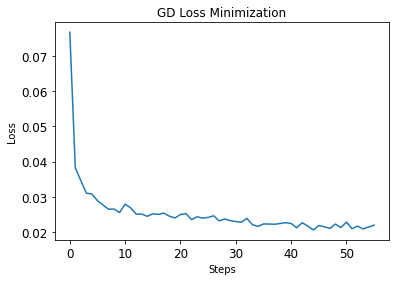

In [15]:
def plot_loss(model):
    plt.plot(model.loss_curve_)
    plt.title('GD Loss Minimization')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    
plot_loss(mlp)

# Visualize the neural network architecture

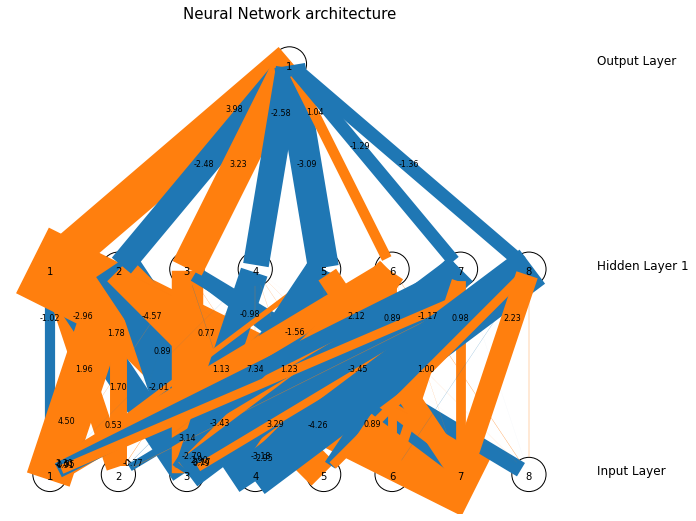

In [16]:
def nn_diagram(X, y, model, show_weights):

    # Create structure of network from dataset shapes and hidden layer sizes.
    nn_struct = np.hstack(([X.shape[1]], np.asarray(model.hidden_layer_sizes), [y.shape[1]]))

    # Only plot weights if specified.
    if show_weights == True:
        network = VisNN.DrawNN(nn_struct, model.coefs_)
    else:
        network = VisNN.DrawNN(nn_struct)
        
    network.draw()
    
nn_diagram(X_train, y_train, mlp, True)

# Retrieve the neuron weights and bias terms and redraw the network architecture

In [17]:
mlp.coefs_

[array([[-1.02031180e+00,  4.49829074e+00,  1.79626132e-01,
         -7.11496465e-02,  5.31261235e-01,  2.29742131e+00,
         -1.54703916e+00,  9.10465146e-01],
        [ 1.95607501e+00,  1.69550767e+00,  8.28551597e-03,
          3.25147447e-01, -2.19278143e-01, -5.28779301e-02,
         -7.70605678e-01,  3.17169026e-01],
        [-2.96475439e+00, -2.00941611e+00,  3.14471111e+00,
         -2.78679870e+00, -3.43332180e+00,  2.90374828e+00,
         -3.17437604e+00,  7.93467280e-01],
        [ 1.78460106e+00, -4.57118512e+00, -2.04029054e-01,
          2.16160360e-01, -3.18491609e+00,  2.95288316e+00,
         -3.45060090e+00, -4.25790413e+00],
        [ 8.91414776e-01,  3.29405872e+00,  1.99987715e-01,
          1.60175163e-01,  1.15090913e-01,  3.87312450e-02,
         -1.17371193e+00,  8.92851504e-01],
        [ 1.13051898e+00,  7.71769756e-01, -1.28962114e-04,
          1.59266235e-01,  4.55011275e-01,  8.87597204e-01,
          9.96607429e-01, -1.55866596e-01],
        [ 7.3352

In [18]:
print('Weights between input layer and hidden layer:')
print(mlp.coefs_[0], '\n')
print('Weights between hidden layer and output layer:')
print(mlp.coefs_[1], '\n')
print('Bias terms between input layer and hidden layer:')
print(mlp.intercepts_[0], '\n')
print('Bias terms between hidden layer and output layer:')
print(mlp.intercepts_[1])

Weights between input layer and hidden layer:
[[-1.02031180e+00  4.49829074e+00  1.79626132e-01 -7.11496465e-02
   5.31261235e-01  2.29742131e+00 -1.54703916e+00  9.10465146e-01]
 [ 1.95607501e+00  1.69550767e+00  8.28551597e-03  3.25147447e-01
  -2.19278143e-01 -5.28779301e-02 -7.70605678e-01  3.17169026e-01]
 [-2.96475439e+00 -2.00941611e+00  3.14471111e+00 -2.78679870e+00
  -3.43332180e+00  2.90374828e+00 -3.17437604e+00  7.93467280e-01]
 [ 1.78460106e+00 -4.57118512e+00 -2.04029054e-01  2.16160360e-01
  -3.18491609e+00  2.95288316e+00 -3.45060090e+00 -4.25790413e+00]
 [ 8.91414776e-01  3.29405872e+00  1.99987715e-01  1.60175163e-01
   1.15090913e-01  3.87312450e-02 -1.17371193e+00  8.92851504e-01]
 [ 1.13051898e+00  7.71769756e-01 -1.28962114e-04  1.59266235e-01
   4.55011275e-01  8.87597204e-01  9.96607429e-01 -1.55866596e-01]
 [ 7.33525517e+00  1.22646934e+00 -9.75125992e-01  8.74484016e-02
   2.11501551e+00  1.06515414e-01  9.76802483e-01  2.23427595e+00]
 [ 5.30112451e-02 -1.56

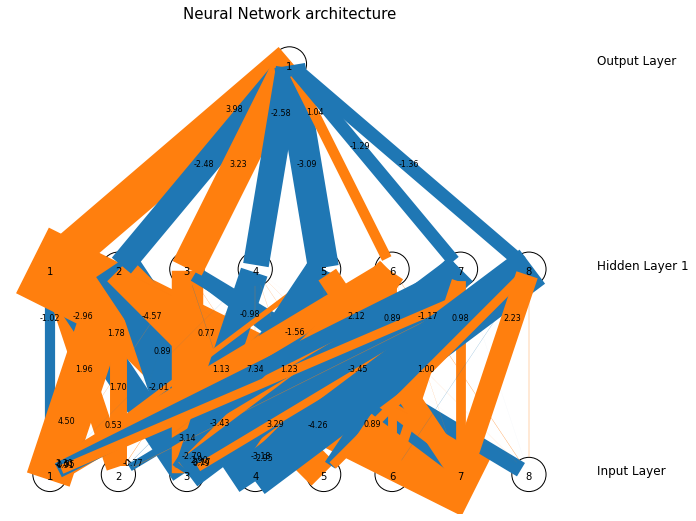

In [19]:
nn_diagram(X_train, y_train, mlp, True, )

# Fit an MLP model using grid search with cross-validation

In [20]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(alpha = 0.0001,
                    learning_rate_init = 0.001,
                    max_iter = 500,
                    tol = 1e-4,
                    n_iter_no_change = 10,
                    random_state = 87)

grid = {'hidden_layer_sizes': [(5), (6)],
        'activation': ['logistic', 'tanh', 'relu'],
        'solver': ['sgd', 'adam']}

search = GridSearchCV(mlp, param_grid = grid, scoring = 'accuracy', cv = 3)

start = time()
search.fit(X_train, np.ravel(y_train))
end = time()
train_time = (end - start)

print('Grid search took {:.2f} seconds to find an optimal fit.'.format(train_time))
print(search.best_params_)

Grid search took 82.55 seconds to find an optimal fit.
{'activation': 'logistic', 'hidden_layer_sizes': 6, 'solver': 'sgd'}


In [21]:
score = search.score(X_test, y_test)

print('Accuracy: {:.0f}%'.format(score * 100))

Accuracy: 94%


# Visualize the loss minimization of the optimized model

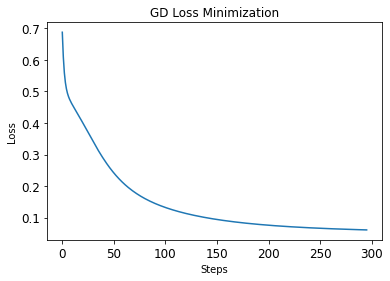

In [22]:
plot_loss(search.best_estimator_)

# Visualize the network structure of the optimized model

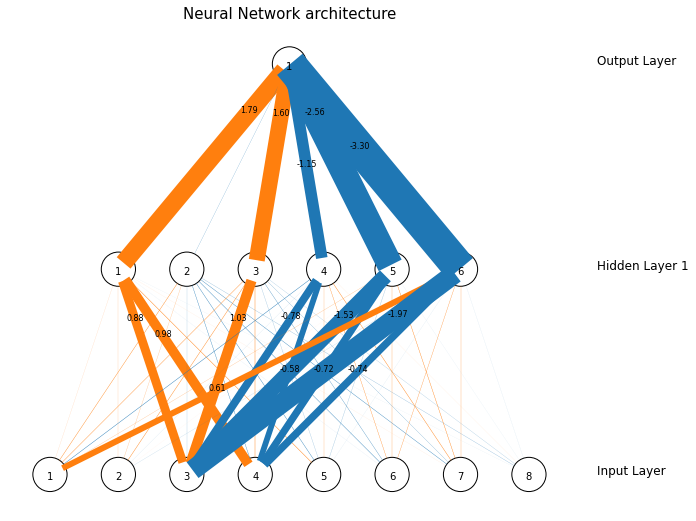

In [23]:
nn_diagram(X_train, y_train, search.best_estimator_, True)

# Examine the model's predictions on the test set

In [24]:
# Show example predictions with the test data.
results = data_raw_test.copy()
results['PredictedOccupancy'] = search.predict(X_test)
results.rename(columns = {'Occupancy': 'ActualOccupancy'}, inplace = True)  # Clarify ground truth column.
results.head(50)

,Date,Temperature,RelativeHumidity,Light,CO2,HumidityRatio,ActualOccupancy,PredictedOccupancy
0,2/2/2015 23:49,20.650000,22.245000,0.000000,443.000000,0.003342,0,0
1,2/2/2015 21:10,20.890000,23.000000,0.000000,491.666667,0.003508,0,0
2,2/3/2015 19:56,21.245000,27.745000,0.000000,770.750000,0.004331,0,0
3,2/3/2015 5:51,20.290000,22.650000,0.000000,431.000000,0.003328,0,0
4,2/3/2015 2:12,20.525000,22.267500,0.000000,442.750000,0.003320,0,0
5,2/4/2015 8:50,21.200000,25.180000,454.000000,740.200000,0.003917,1,0
6,2/2/2015 17:19,22.500000,24.865000,433.000000,816.500000,0.004189,1,1
7,2/4/2015 9:56,23.200000,25.500000,722.000000,1011.400000,0.004485,1,1
8,2/4/2015 8:44,21.083333,25.200000,453.000000,719.500000,0.003892,1,0
9,2/3/2015 13:28,23.200000,25.550000,171.000000,918.000000,0.004494,0,0
